# 면적 그래프

## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 1. 데이터 전처리

In [2]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( 'C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part4\\시도별 전출입 인구수.xlsx',
                    engine = 'openpyxl' )
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [3]:
# 결측치 확인
df.isnull().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [4]:
# '전출지별' 컬럼에 NaN 값 존재 (엑셀 양식에서 셀이 병합된 부분)
# 누락값(NaN)을 앞 데이터로 채움 

df = df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리하기 위해 데이터프레임 재구성

# 전출지가 서울이고, 전입지는 서울이 아닌 지역인 데이터만 추출
filtering = ( df['전출지별'] == '서울특별시' ) & ( df['전입지별'] != '서울특별시' ) 
df_seoul = df[ filtering ]

# '전출지별' 컬럼은 필요 없으므로 삭제
df_seoul = df_seoul.drop( '전출지별', axis = 1)

# '전입지별' 컬럼이름을 '전입지'로 변경
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

# 전입지를 기준으로 행 데이터를 선택할수 있도록 인덱스 지정
df_seoul.set_index('전입지', inplace=True)

df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


## 2. 시각화

In [10]:
# 연도별로 정리하기 쉽도록 행렬 전치 수행
df_seoul_T = df_seoul.T

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
df_2 = df_seoul_T[ ['충청남도','경상북도', '강원도', '전라남도'] ]
df_2

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


### 면적 그래프 그리기

In [ ]:
# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
# 이 과정을 생략해도 인덱스를 정수형으로 인식하여 x축에 표시 하는듯 함.
df_3.index = df_3.index.map(int)

In [11]:
# 스타일 서식 지정
plt.style.use('ggplot') 

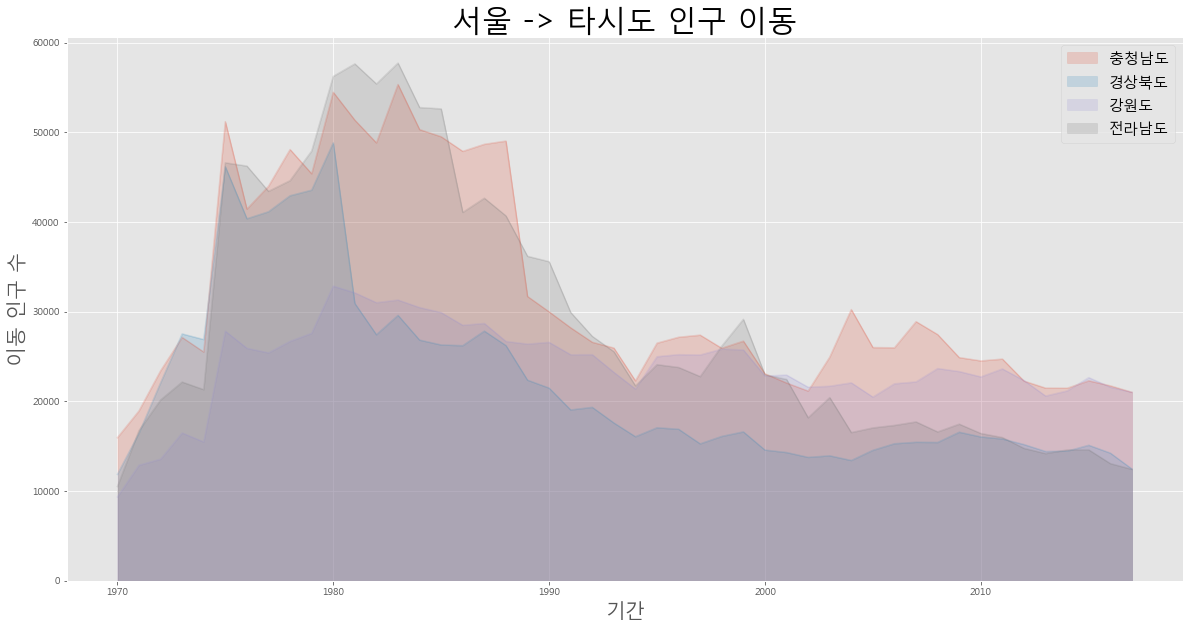

In [12]:
# 면적 그래프 그리기
df_3.plot( kind='area',  # 면적 그래프를 출력하는 옵션
           stacked=False,  # 누적 그래프 여부
           alpha=0.2,  # 그래프의 투명도
           figsize=(20, 10) )  # 그래프 프레임 사이즈

plt.title( '서울 -> 타시도 인구 이동', size=30 )
plt.ylabel( '이동 인구 수', size=20 )
plt.xlabel( '기간', size=20 )

plt.legend( loc='best', fontsize=15 )

plt.show()

In [ ]:
# 면적 그래프 그리기
df_3.plot( kind='area', stacked=True, alpha=0.2, figsize=(20, 10) )

plt.title( '서울 -> 타시도 인구 이동', size=30 )
plt.ylabel( '이동 인구 수', size=20 )
plt.xlabel( '기간', size=20 )

plt.legend( loc='best', fontsize=15 )

plt.show()

#### 세부 옵션 조정

In [ ]:
# 세부 옵션 조정
# 책에서는 타이틀 색깔 등을 변경하려면 axe 객체의 속성을 이용하라고 되어 있지만
# axe 객체 속성을 사용하지 않고 plot() 의 옵션만으로도 동일한 수정이 가능함.

df_3.plot( kind='area', stacked=True, alpha=0.2, figsize=(20, 10) )

plt.title( '서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold' )
plt.ylabel( '이동 인구 수', size=20, color='blue' )
plt.xlabel( '기간', size=20, color='blue' )

plt.legend( loc='best', fontsize=15 )

plt.show()

#### axe 객체 활용하여 그래프 꾸미기

In [ ]:
# 면적 그래프 axe 객체 생성

ax = df_3.plot( kind='area', stacked=True, alpha=0.2, figsize=(20, 10) )
print( type(ax) )

# axe 객체 설정 변경
ax.set_title( '서울 -> 타시도 인구 이동', size=30,
              color='brown', weight='bold' )

ax.set_ylabel( '이동 인구 수', size=20,
               color='blue' )
ax.set_xlabel( '기간', size=20,
               color='blue' )

ax.legend(loc='best', fontsize=15)

plt.show()